In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [262]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [263]:
data = pd.read_csv("/kaggle/input/ev-cars-user-reviews-india/2-wheeler-EV-bikewale.csv")

In [264]:
data.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube


<Axes: >

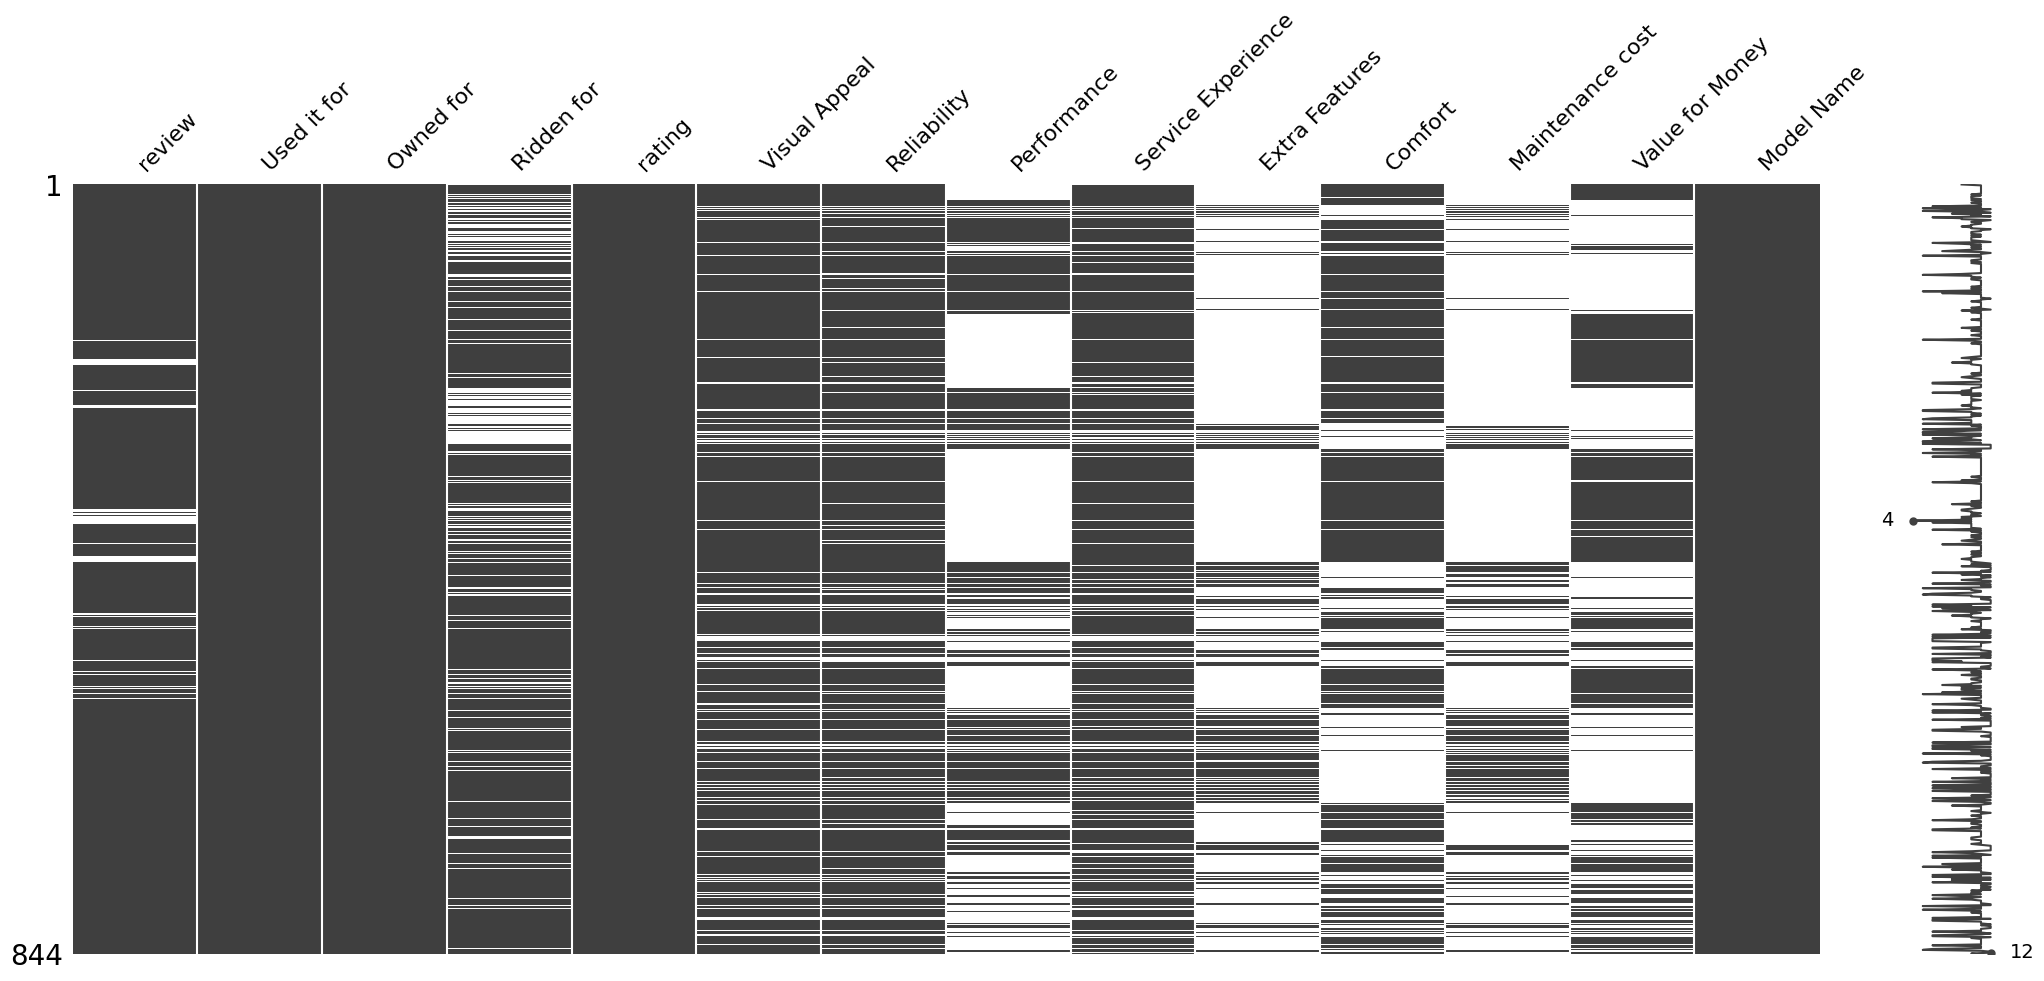

In [265]:
import missingno as msno
msno.matrix(data)

In [266]:
((data.isnull().sum() * 100/data.shape[0])).sort_values(ascending = False)

Maintenance cost      78.672986
Extra Features        78.080569
Performance           59.123223
Value for Money       53.791469
Comfort               37.203791
Ridden for            20.853081
Service Experience    16.706161
Reliability           15.165877
Visual Appeal         12.440758
review                 5.568720
Used it for            0.000000
Owned for              0.000000
rating                 0.000000
Model Name             0.000000
dtype: float64

In [267]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review              797 non-null    object 
 1   Used it for         844 non-null    object 
 2   Owned for           844 non-null    object 
 3   Ridden for          668 non-null    object 
 4   rating              844 non-null    int64  
 5   Visual Appeal       739 non-null    float64
 6   Reliability         716 non-null    float64
 7   Performance         345 non-null    float64
 8   Service Experience  703 non-null    float64
 9   Extra Features      185 non-null    float64
 10  Comfort             530 non-null    float64
 11  Maintenance cost    180 non-null    float64
 12  Value for Money     390 non-null    float64
 13  Model Name          844 non-null    object 
dtypes: float64(8), int64(1), object(5)
memory usage: 92.4+ KB


In [268]:
data['Used it for'].unique()

array(['Daily Commute', 'Everything', 'Occasional Commute',
       'Leisure Rides', 'Tours'], dtype=object)

In [269]:
sentiments = SentimentIntensityAnalyzer()
sentiments_list = []

for review_text in data['review']:
    if pd.isna(review_text):
        sentiments_list.append('neutral')
        continue
    sentiment_scores = sentiments.polarity_scores(review_text)

    positive_score = sentiment_scores['pos']
    negative_score = sentiment_scores['neg']

    if positive_score > negative_score:
        sentiment_label = 'positive'
    elif positive_score < negative_score:
        sentiment_label = 'negative'
    else:
        sentiment_label = 'neutral'

    sentiments_list.append(sentiment_label)
    
data['sentiment'] = sentiments_list

In [270]:
data['sentiment'].value_counts()

sentiment
positive    534
negative    258
neutral      52
Name: count, dtype: int64

In [271]:
data_one = data[['Used it for', 'Owned for', 'Ridden for', 'rating',
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money',
       'sentiment']].copy()

In [272]:
data_one.head()

,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,sentiment
0,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,negative
1,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,negative
2,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,positive
3,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,negative
4,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,negative


# Behavioral Segmentation

In [273]:
data_final = data_one.iloc[:, 4:-1].copy()

In [274]:
data_final = data_final.fillna(0.)

In [275]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Visual Appeal       844 non-null    float64
 1   Reliability         844 non-null    float64
 2   Performance         844 non-null    float64
 3   Service Experience  844 non-null    float64
 4   Extra Features      844 non-null    float64
 5   Comfort             844 non-null    float64
 6   Maintenance cost    844 non-null    float64
 7   Value for Money     844 non-null    float64
dtypes: float64(8)
memory usage: 52.9 KB


In [276]:
data_final.mean()

Visual Appeal         3.309242
Reliability           2.811611
Performance           1.441943
Service Experience    2.619668
Extra Features        0.643365
Comfort               2.300948
Maintenance cost      0.723934
Value for Money       1.562796
dtype: float64

In [277]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_final)

In [278]:
from sklearn.decomposition import PCA

In [279]:
pca = PCA(random_state = 42)
pca.fit(data_scaled)

PCA(random_state=42)

In [280]:
data_pca = pca.transform(data_scaled)

In [281]:
df_pca = pd.DataFrame(data_pca, columns = [f'PC{x +1}' for x in range(len(data_final.columns))])

In [282]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.291227,-1.038055,0.354864,-0.623469,-1.102720,-0.169287,-0.438012,0.957827
1,0.710801,-1.394405,-0.360466,-0.621671,0.320899,-0.086053,-0.426279,-0.149917
2,-0.849149,-1.189765,0.167683,-0.410898,-0.409054,-0.191904,-0.329993,0.830738
3,1.967022,-0.878935,-0.100197,0.330003,-0.075822,0.069599,0.013068,0.011328
4,0.078940,-1.017161,-0.079210,-0.324132,-0.961554,0.005517,-0.107260,0.427972


In [283]:
pca_summary = pd.DataFrame({'Standard Deviation':df_pca.std(),
                           'Proportion of Variance': pca.explained_variance_ratio_,
                           'Cumultive Proportion': pca.explained_variance_ratio_.cumsum()})

In [284]:
pca_summary

,Standard Deviation,Proportion of Variance,Cumultive Proportion
PC1,1.845017,0.425007,0.425007
PC2,1.736646,0.376546,0.801553
PC3,0.903486,0.101915,0.903468
PC4,0.517750,0.033468,0.936936
PC5,0.405239,0.020503,0.957439
PC6,0.379558,0.017987,0.975426
PC7,0.337883,0.014254,0.989680
PC8,0.287510,0.010320,1.000000


In [285]:
factor_loadings = pd.DataFrame(pca.components_, columns = data_final.columns, index = df_pca.columns).T

In [286]:
factor_loadings.style.background_gradient(cmap = 'Blues')

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Visual Appeal,-0.480170,0.117814,0.063320,-0.730598,0.247014,0.105903,0.375474,0.067539
Reliability,-0.494758,0.124910,-0.002776,0.152447,-0.819319,0.060484,0.117211,0.166384
Performance,-0.128721,0.459145,0.574833,-0.005549,-0.019902,-0.025704,-0.288468,-0.598232
Service Experience,-0.486499,0.100691,-0.054176,0.653781,0.470391,0.052432,0.311210,-0.044129
Extra Features,-0.024373,0.519633,-0.364578,-0.023208,0.116821,0.559390,-0.456829,0.246323
Comfort,-0.418255,-0.304266,0.249807,-0.020111,0.172621,-0.296656,-0.623271,0.404238
Maintenance cost,0.005912,0.513208,-0.386495,-0.054822,0.020302,-0.762039,-0.003360,0.055435
Value for Money,-0.309572,-0.351548,-0.563840,-0.107598,-0.046688,0.009572,-0.260855,-0.617065


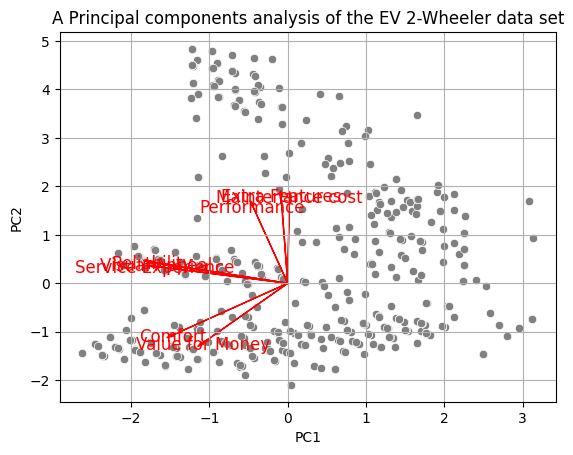

In [287]:
# Calculate centroid
index_names = factor_loadings.index

# Plot data points
sns.scatterplot(df_pca, x = 'PC1', y = 'PC2', color = 'grey')

# Plot arrows from centroid to provided coordinates with index names
for i in range(len(factor_loadings['PC1'])):
    plt.arrow(0, 0, factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5, head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text((factor_loadings['PC1'][i] * 3.5), factor_loadings['PC2'][i]* 3.5, index_names[i], fontsize=12, ha='center', color = 'red', va = 'center_baseline')

# Set labels and legend
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('A Principal components analysis of the EV 2-Wheeler data set')
plt.grid(True)
plt.show()

In [288]:
from sklearn.cluster import KMeans

In [289]:
data_km28 = [KMeans(n_clusters = k, random_state = 42).fit(data_scaled) for k in range(2, 9)]

In [290]:
wcss = [model.inertia_ for model in data_km28]

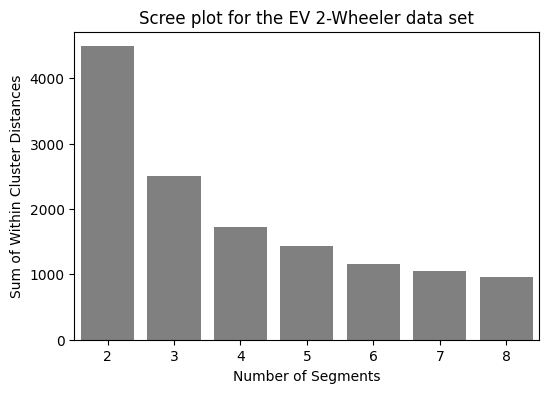

In [291]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = list(range(2, 9)), y = wcss, color = 'grey')
plt.xlabel("Number of Segments")
plt.ylabel('Sum of Within Cluster Distances')
plt.title("Scree plot for the EV 2-Wheeler data set")
plt.show()

<Axes: >

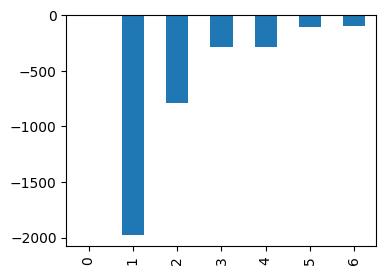

In [292]:
pd.Series(wcss).diff().plot.bar(figsize = (4, 3))

In [293]:
kmeans = data_km28[2]

In [294]:
data_clust = pd.DataFrame(data_scaled, columns = data_final.columns)
data_clust['cluster'] = kmeans.labels_

In [295]:
data_pca = df_pca.copy()
data_pca['cluster'] = kmeans.labels_

# Profiling Segments

In [296]:
data_profile = data_final.copy()
data_profile['cluster'] = kmeans.labels_

In [297]:
columns_segment = data_clust.columns
data_pivot = data_profile[columns_segment].groupby('cluster').mean().T

In [298]:
data_pivot_mean = data_pivot.mean(axis = 1).reset_index()
data_pivot_mean.columns = ['Variable', 'Value']

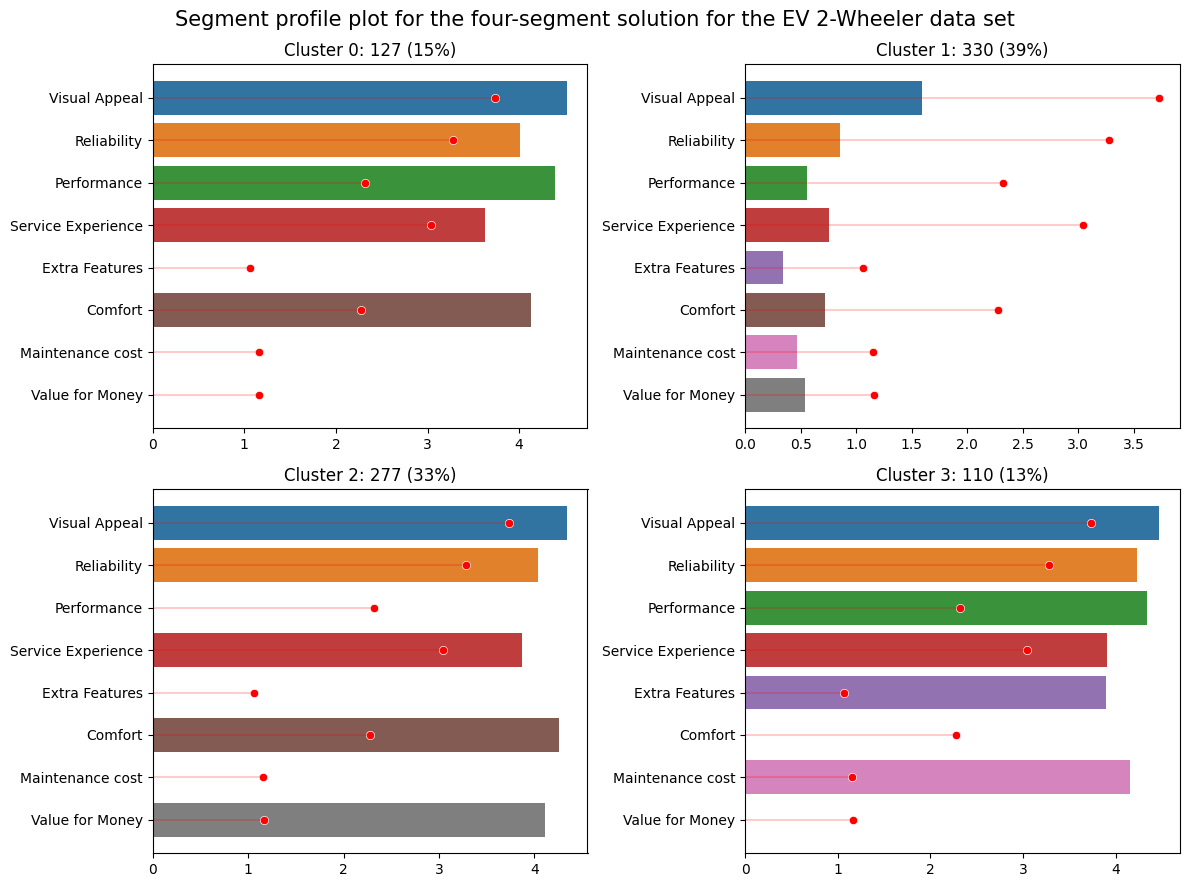

In [299]:
plt.figure(figsize = (12, 9))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.barplot(data_pivot, x = i, y = data_pivot.index)
    sns.scatterplot(data_pivot_mean, x = 'Value', y = 'Variable', color = 'red')
    for index, row in data_pivot_mean.iterrows():
        plt.hlines(y=row['Variable'], xmin=0, xmax=row['Value'], colors='red', alpha = 0.2)
    plt.ylabel("")
    plt.xlabel("")
    plt.title(f"Cluster {i}: {data_profile['cluster'].value_counts()[i]} ({data_profile['cluster'].value_counts()[i]*100/len(data_profile):.0f}%)")
plt.suptitle("Segment profile plot for the four-segment solution for the EV 2-Wheeler data set", fontsize = 15)
plt.tight_layout()
plt.show()

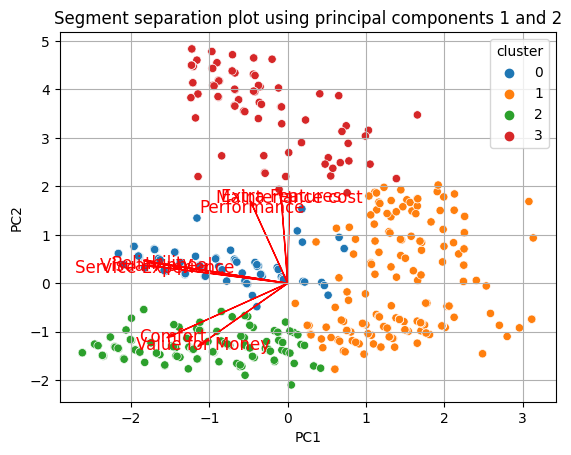

In [355]:
# Calculate centroid
index_names = factor_loadings.index

# Plot data points
sns.scatterplot(data_pca, x = 'PC1', y = 'PC2', hue = 'cluster', palette = 'tab10')

# Plot arrows from centroid to provided coordinates with index names
for i in range(len(factor_loadings['PC1'])):
    plt.arrow(0, 0, factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5, head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text(factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i]* 3.5, index_names[i], fontsize=12, ha='center', color = 'red', va = 'center_baseline')

# Set labels and legend
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Segment separation plot using principal components 1 and 2')
plt.grid(True)
plt.show()

* **Cluster 0:** Visual, Reliability & Service Experience
* **Cluster 2:** Comfort & Value for Money
* **Cluster 3:** Performance, Extra Features & Maintenance Cost


In [301]:
data_final

,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money
0,3.0,4.0,0.0,0.0,0.0,4.0,0.0,1.0
1,3.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0
2,4.0,4.0,0.0,2.0,0.0,5.0,0.0,2.0
3,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,3.0,4.0,0.0,1.0,0.0,3.0,0.0,2.0
...,...,...,...,...,...,...,...,...
839,2.0,2.0,0.0,2.0,0.0,2.0,0.0,3.0
840,5.0,5.0,5.0,5.0,5.0,0.0,5.0,0.0
841,2.0,2.0,4.0,2.0,3.0,0.0,1.0,0.0
842,4.0,4.0,0.0,0.0,0.0,4.0,0.0,5.0


# Describing Segments

In [302]:
data_desc = data_one.copy()
data_desc['cluster'] = kmeans.labels_

In [321]:
data_desc['Model Name'] = data['Model Name'].copy()

In [303]:
data_absdesc.columns

Index(['Used it for', 'Owned for', 'Ridden for', 'rating', 'Visual Appeal',
       'Reliability', 'Performance', 'Service Experience', 'Extra Features',
       'Comfort', 'Maintenance cost', 'Value for Money', 'sentiment',
       'cluster'],
      dtype='object')

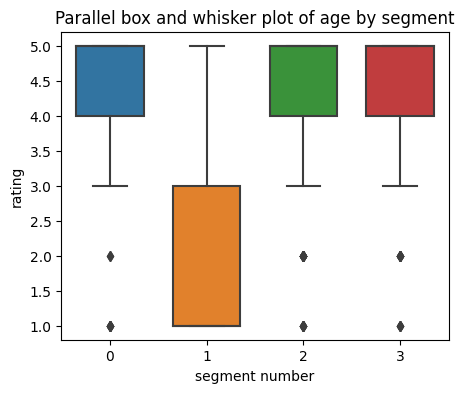

In [356]:
# Number of cluster along the x-axis and rating along the y-axis
plt.figure(figsize = (5,4))
sns.boxplot(data_desc, x= 'cluster', y = 'rating', palette = 'tab10', width = 0.7)
plt.xlabel("segment number")
plt.ylabel("rating")
plt.title("Parallel box and whisker plot of age by segment")
plt.show()

In [305]:
def mosaicplot(df, color_list, figsize=(5,5), barwidth = 1, title = "Simple Mosaic Plot", xlabel = 'cat'):
    
    fig, ax = plt.subplots(figsize =figsize)
    
    # Convert to ratio of each row sum and do a cumsum along row
    p_cnt_ratio_df = df.div(df.sum(1), axis =0)
    ratio_cum_df = p_cnt_ratio_df.cumsum(axis=1)
    
    # Get column order.
    col_order = ratio_cum_df.columns.tolist()
        
    x = [str(n) for n in ratio_cum_df.index.tolist()]
    
    # Do the actual plots
    for col, colour in zip(col_order[::-1], color_list):
        plt.bar(x, ratio_cum_df[col], color=colour, edgecolor='white', width=barwidth, label=col)
        
    # Add in legend
    plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
    

    # Configure title and axis
    plt.title(title)
    plt.xlabel(df.index.name)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    plt.yticks([])


In [306]:
color_list = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2', '#7F7F7F']

In [307]:
sentiment_cluster = pd.crosstab(index = data_desc['cluster'], columns = data_desc['sentiment'])

In [308]:
sentiment_cluster

sentiment,negative,neutral,positive
cluster,,,
0,12,4,111
1,202,7,121
2,30,41,206
3,14,0,96


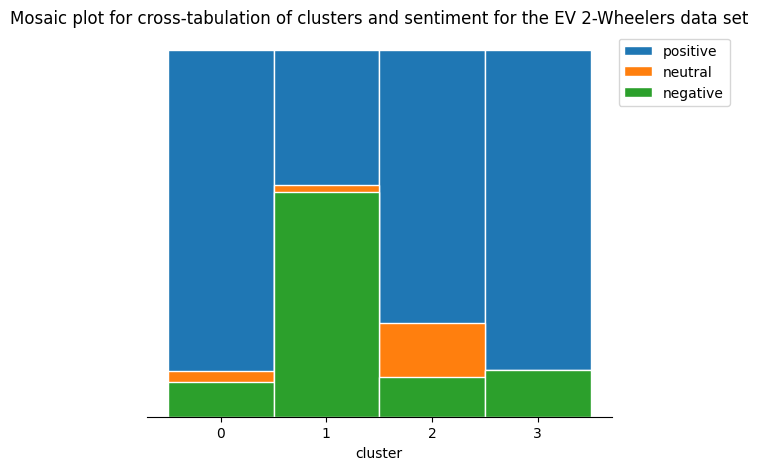

In [309]:
mosaicplot(sentiment_cluster, color_list[:3], figsize=(6,5), barwidth = 1, title = 'Mosaic plot for cross-tabulation of clusters and sentiment for the EV 2-Wheelers data set' )

In [310]:
used_cluster = pd.crosstab(index = data_desc['cluster'], columns = data_desc['Used it for'])

In [311]:
used_cluster

Used it for,Daily Commute,Everything,Leisure Rides,Occasional Commute,Tours
cluster,,,,,
0,75,39,4,9,0
1,244,47,7,27,5
2,194,55,7,19,2
3,87,19,2,1,1


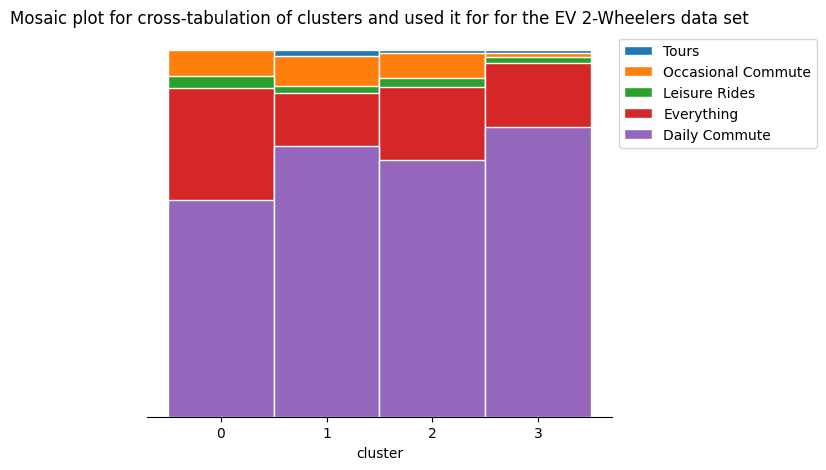

In [312]:
mosaicplot(used_cluster, color_list[:5], figsize=(6,5), barwidth = 1, title = 'Mosaic plot for cross-tabulation of clusters and used it for for the EV 2-Wheelers data set' )

In [313]:
owned_cluster = pd.crosstab(index = data_desc['cluster'], columns = data_desc['Owned for'])

In [314]:
owned_cluster

Owned for,3-6 months,6 months-1 yr,< 3 months,> 1 yr,Never owned,Occasional Commute
cluster,,,,,,
0,16,14,31,10,56,0
1,40,55,67,117,50,1
2,41,51,79,56,50,0
3,14,14,43,20,19,0


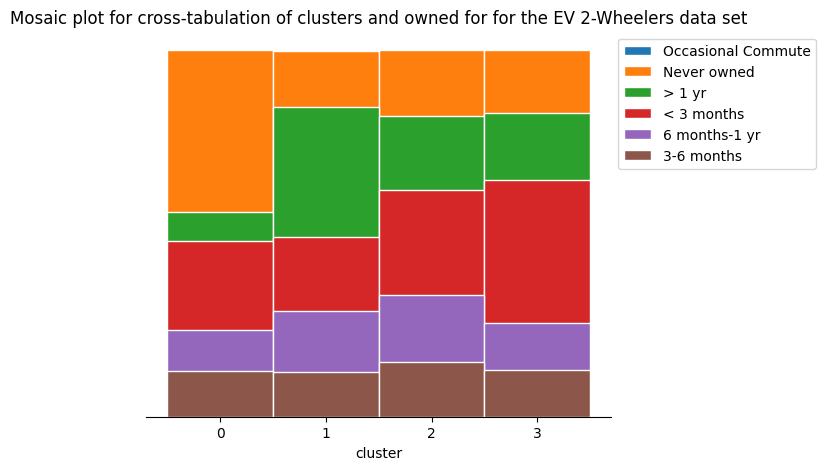

In [315]:
mosaicplot(owned_cluster, color_list[:6], figsize=(6,5), barwidth = 1, title = 'Mosaic plot for cross-tabulation of clusters and owned for for the EV 2-Wheelers data set' )

In [316]:
ridden_cluster = pd.crosstab(index = data_desc['cluster'], columns = data_desc['Ridden for'])

In [317]:
ridden_cluster

Ridden for,10000-15000 kms,5000-10000 kms,< 5000 kms,> 15000 kms,Never owned
cluster,,,,,
0,1,15,54,1,0
1,15,61,184,18,1
2,11,44,158,14,0
3,5,18,63,5,0


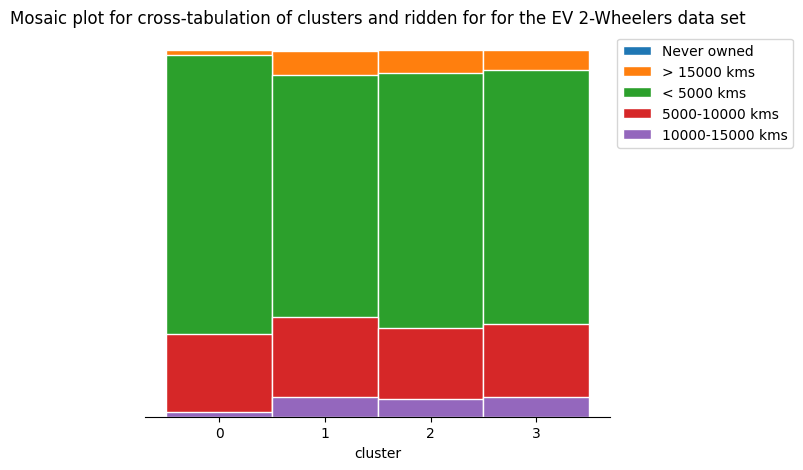

In [318]:
mosaicplot(ridden_cluster, color_list[:5], figsize=(6,5), barwidth = 1, title = 'Mosaic plot for cross-tabulation of clusters and ridden for for the EV 2-Wheelers data set' )

In [323]:
model_name_cluster = pd.crosstab(index = data_desc['Model Name'], columns = data_desc['cluster'])

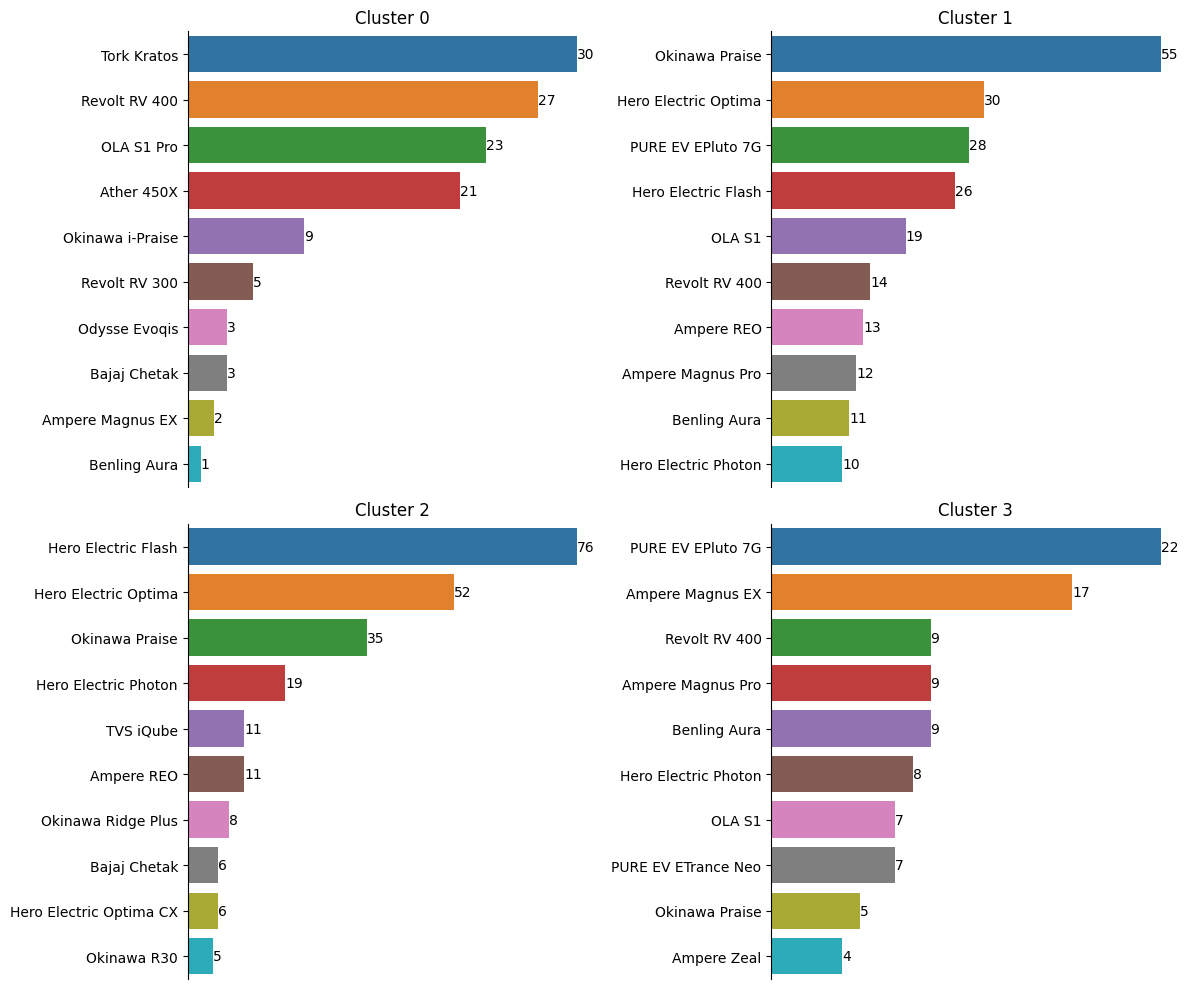

In [358]:
plt.figure(figsize = (12, 10))
for i in range(4):
    plt.subplot(2, 2, i+1)
    top_5_model = model_name_cluster[i].sort_values(ascending = False).head(10).reset_index()
    ax = sns.barplot(y = top_5_model['Model Name'], x = top_5_model[i], palette = 'tab10')
    ax.bar_label(ax.containers[0])
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks([])
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    plt.title(f"Cluster {i}")
plt.tight_layout()
plt.show()

In [359]:
data['Model Name'].unique()

array(['TVS iQube', 'Revolt RV 400', 'Bajaj Chetak', 'OLA S1 Pro',
       'Ather 450X', 'Hero Electric Optima', 'Tork Kratos', 'OLA S1',
       'Bounce Infinity E1', 'Hero Electric Optima CX',
       'Hero Electric Flash', 'Ampere Magnus EX', 'Revolt RV 300',
       'Hero Electric Photon', 'Okinawa Praise', 'Benling Aura',
       'Ampere Magnus Pro', 'PURE EV EPluto 7G', 'Ampere REO',
       'Odysse Evoqis', 'Hero Electric NYX HX', 'Okinawa i-Praise',
       'Joy e-bike Monster', 'PURE EV ETrance Neo', 'Evolet Polo',
       'Okinawa Ridge Plus', 'Ampere Zeal', 'Hero Electric Atria',
       'Okinawa Lite', 'Hero Electric NYX', 'Okinawa R30', 'Yo Drift',
       'BGauss B8', 'Joy e-bike Wolf', 'Gemopai Astrid Lite',
       'Techo Electra Emerge', 'Techo Electra Raptor', 'e-bike Gen Nxt',
       'Gemopai Ryder'], dtype=object)